In [7]:
%pip install imageio --quiet
%pip install numpy  --quiet
%pip install matplotlib --quiet


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def leer_imagen(ruta):
    """
    La función leer_imagen recibe un string con la ruta
    de una imagen en formato BMP y retorna una lista de
    tres dimensiones con el mapa de bits de la imagen.
    Asimismo, convertimos la lista de numpy a una lista
    común y corriente.
    """
    np_array = np.array(imageio.imread(ruta), dtype='int')
    # noinspection PyTypeChecker
    lista_3d = np_array.tolist()
    return lista_3d


def guardar_imagen(ruta, lista_3d):
    """
    La función guardar_imagen recibe una lista de 3
    dimensiones con el mapa de bits de la imagen
    y retorna la imagen en formato bmp.
    """
    return imageio.imwrite(ruta, np.array(lista_3d, dtype='uint8'))

def mostrar_imagen(ruta):
  img = imageio.imread(ruta)
  plt.imshow(img)
  plt.show()

In [10]:
img_name = 'images/playa.bmp'
img_3d = leer_imagen(img_name)

In [11]:
print(len(img_3d))
print(len(img_3d[0]))
print(img_3d[0][0])

365
640
[168, 23, 54]


In [12]:
result = np.array([255, 255, 255]) - np.array([168, 23, 54])
result.tolist()

[87, 232, 201]

In [13]:
# Ejercicio 1: Filtro Negativo
rows = len(img_3d)
cols = len(img_3d[0])

for i in range(rows):
  for j in range(cols):
    img_3d[i][j] = (np.array([255, 255, 255]) - np.array(img_3d[i][j])).tolist()

#guardar_imagen(f"negative_{img_name}", img_3d)

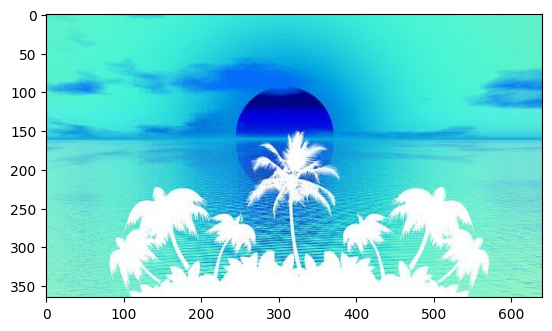

In [14]:
#mostrar_imagen(f"negative_{img_name}")
plt.imshow(img_3d)

In [15]:
# Ejercicio 2: Rotar 180 grados
img_name = 'images/playa.bmp'
img_3d = leer_imagen(img_name)

rows = len(img_3d)
cols = len(img_3d[0])

img_rotada = np.zeros((rows, cols, 3), dtype=np.uint8)

for i in range(rows):
  for j in range(cols):
    img_rotada[i][j] = img_3d[rows - i - 1][cols - j - 1]

#guardar_imagen(f"rotated_{img_name}", img_rotada)

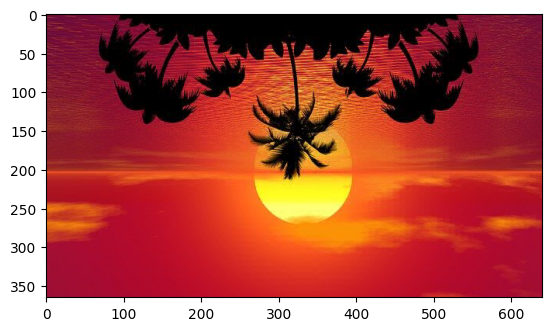

In [16]:
#mostrar_imagen(f"rotated_{img_name}")
plt.imshow(img_rotada)

In [17]:
# Ejercicio 3: Cambiar cuadrantes
img_name = 'images/playa.bmp'
lista_3d = leer_imagen(img_name)

width = len(lista_3d)
height = len(lista_3d[0])
chanels = 3

mid_height = height // 2
mid_width = width // 2

q1 = [fila[: height //2 - 1] for fila in lista_3d[:width // 2 - 1]]
q2 = [fila[height //2: height - 1] for fila in lista_3d[:width // 2 - 1]]
q3 = [fila[: height //2 - 1] for fila in lista_3d[width // 2 : ]]
q4 = [fila[height //2: height - 1] for fila in lista_3d[width // 2 : ]]

#guardar_imagen(f"q1_{img_name}", q1)
#guardar_imagen(f"q2_{img_name}", q2)
#guardar_imagen(f"q3_{img_name}", q3)
#guardar_imagen(f"q4_{img_name}", q4)
#mostrar_imagen(f"q1_{img_name}")
#mostrar_imagen(f"q2_{img_name}")
#mostrar_imagen(f"q3_{img_name}")
#mostrar_imagen(f"q4_{img_name}")

In [18]:
# Ejercicio 3: Cambiar cuadrantes
img_name = 'images/playa.bmp'
lista_3d = leer_imagen(img_name)
len(lista_3d), len(lista_3d[0]), len(lista_3d[0][0])

width, height, channels = len(lista_3d), len(lista_3d[0]), len(lista_3d[0][0])
img_array = np.array(lista_3d).reshape(width, height, chanels)
mid_width = width // 2
mid_height = height // 2

q1 = img_array[:mid_width, :mid_height]
q2 = img_array[:mid_width , mid_height:]
q3 = img_array[mid_width:, :mid_height]
q4 = img_array[mid_width:, mid_height:]

# concatenar cuadrantes (orden correcto)
#top_half = np.concatenate((q1, q2), axis=1) # concatenates q1 and q2 horizontally
#bottom_half = np.concatenate((q3, q4), axis=1)
#full_image = np.concatenate((top_half, bottom_half), axis=0) # concatenates vertically

# concatenar cuadrantes (orden requerido)
top_half = np.concatenate((q4, q3), axis=1) 
bottom_half = np.concatenate((q2, q1), axis=1)
full_image = np.concatenate((top_half, bottom_half), axis=0)

print(img_array.shape)
print(mid_width, mid_height)

(365, 640, 3)
182 320


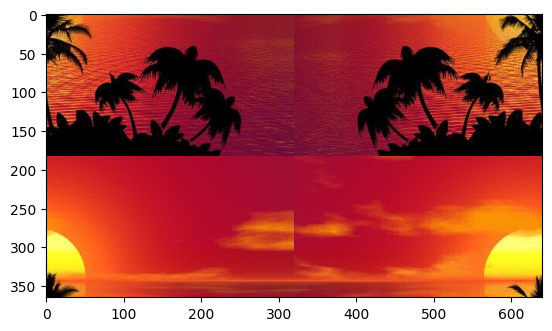

In [19]:
plt.imshow(full_image)

365 640
146 138


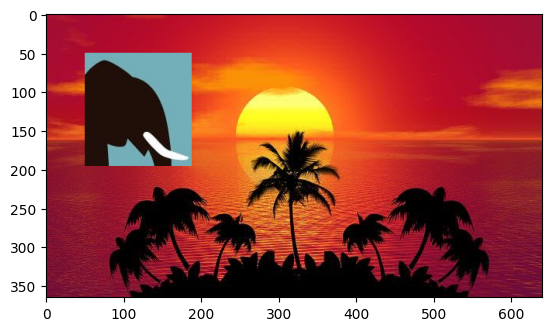

In [20]:
# Ejercicio 4: Superposicion de imagenes

img_bitch_name = 'images/playa.bmp'
img_bitch = leer_imagen(img_bitch_name)
bitch_width,  bitch_height = len(img_bitch), len(img_bitch[0])
print(bitch_width, bitch_height)

img_elephant_name = 'images/elefante.bmp'
img_elephant = leer_imagen(img_elephant_name)
eleph_width,  eleph_height = len(img_elephant), len(img_elephant[0])
print(eleph_width, eleph_height)

bitch_eleph_image = np.zeros_like(img_bitch)

for i in range(bitch_width):
    for j in range(bitch_height):
        if (50 <= i < 50 + eleph_width) and (50 <= j < 50 + eleph_height):
            bitch_eleph_image[i][j] = img_elephant[i - 50][j - 50]
        else:
            bitch_eleph_image[i][j] = img_bitch[i][j]
        
plt.imshow(bitch_eleph_image)

In [21]:
img_elephant[0][137]

[115, 175, 185]